# Feature Engineering for HealthCare Industry Fraud Detection

## Objective
- Glossary:
- Total discharges: The number of discharges billed by the provider for inpatient hospital services. When you leave a hospital after treatment, you go through a process called hospital discharge. 
- Covered Charges: Charges for covered services that your health plan paid for. There may be a limit on covered charges if you receive services from providers outside your plan's network of providers. 
- Covered Person - Any person covered under the plan. 
- Covered Service - A healthcare provider’s service or medical supplies covered by your health plan. Benefits will be given for these services based on your plan.Total Covered Charge Amount = the sum of all covered charges
- Average Covered Charges = Total Covered Charge Amount / Total Discharges 
- Payment is the amount a hospital actually receives for providing patient care. This is the actual amount paid to a hospital by consumers, insurers or governments. The sources of payment are:
- Medicare and Medicaid ,Private insurer if any, The Patient
- Average Total Payments = Total Payments / Total Discharges
- Average Medicare Payments = Medicare Payment Amount / Total Discharges
- ===============================================================================================
- Medical fraud occurs when a doctor purposefully submits false claims or makes false statements.
- An efficient feature should be able to recognize outliers. Imagine if a doctor created a fake patient and generated numerous bills for that fake patient.
- With the help of these features, healthcare data would be able to identify anomalies and fraud.



## Table of Contents
* [Section 1: Data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: Data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by Name](#Section_22)    
    * [Section 2.3: Count by Cities](#Section_23)
    * [Section 2.4: Count by State ](#Section_24)
    * [Section 2.5: Distribution of payments of different procedures for the top 5 discharges](#Section_25)
    * [Section 2.6: Distribution of payments of Hospital regions for the top 5 discharges](#Section_26)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: Ratio count of average total payments per state for each drug procedure](#Section_31)
    * [Section 3.2: Ratio count of median total payments per state for each drug](#Section_32)
    * [Section 3.3: Ratio count of total covered charges per provider for each hospital](#Section_33)  
    * [Section 3.4: Ratio count of average medicare charges per provider state for each drug](#Section_34)  
    * [Section 3.5: Ratio count of average number of discharges for each hospital per individual clinical procedure](#Section_35)  
    * [Section 3.6: Ratio count of average covered charges for each hosp per drug](#Section_36)  
    * [Section 3.7: Ratio count of average medicare payments zipcode wise](#Section_37)  
    * [Section 3.8: Ratio count of Average medicare payments for hosp and drug](#Section_38)  
    * [Section 3.9: Ratio count of Median medicare Payments for hosp and drug](#Section_39)  
    * [Section 3.10:Ratio count of median medicare payments for each state and drugs](#Section_40)   

* [Section 4:Anomaly Detection with PyOD using HBOS](#Section_4) 
    * [Section 4.1:Histogram Based Outlier Detection (HBOS)](#Section_41) 
    * [Section 4.2:Business Insights](#Section_42) 

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

### 1.1 Load Data <a class="anchor" id="Section_11"></a>

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install --upgrade seaborn

In [3]:
df = pd.read_csv('/Users/arshithas/Documents/APAN/Sem2/Anamoly_Detection/A4/inpatientCharges.csv')

In [4]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [5]:
df.shape

(163065, 12)

In [6]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

### 1.2 Data Preparation <a class="anchor" id="Section_12"></a>

In [7]:
df.columns = ['DRG_Definition', 'Provider_Id', 'Provider_Name',
       'Provider_Street_Address', 'Provider_City', 'Provider_State',
       'Provider_Zip_Code', 'Hospital_Referral_Region_Description',
       'Total_Discharges', 'Average_Covered_Charges',
       'Average_Total_Payments', 'Average_Medicare_Payments']

In [8]:
# Change data type and transfer spending amount with dollar sign into numeric
df['DRG_Definition'] = df['DRG_Definition'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments'].astype(str)
                             .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Covered_Charges'] = (df['Average_Covered_Charges'].astype(str)
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payments'] = (df['Average_Medicare_Payments'].astype(str)
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/gr/f5m4xwn94f30827t7nnxzvy40000gn/T/ipykernel_3470/3306472758.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Total_Payments'] = (df['Average_Total_Payments'].astype(str)
/var/folders/gr/f5m4xwn94f30827t7nnxzvy40000gn/T/ipykernel_3470/3306472758.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Covered_Charges'] = (df['Average_Covered_Charges'].astype(str)
/var/folders/gr/f5m4xwn94f30827t7nnxzvy40000gn/T/ipykernel_3470/3306472758.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Medicare_Payments'] = (df['Average_Medicare_Payments'].astype(str)


## 2. EDA <a class="anchor" id="Section_2"></a>

### 2.1 Distribution Plot <a class="anchor" id="Section_21"></a>

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

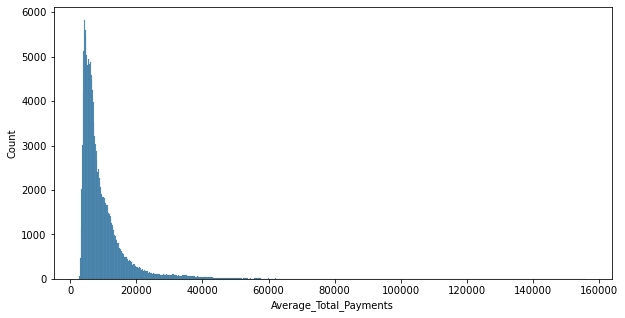

In [9]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(df['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

### 2.2 Count By Provider Name <a class="anchor" id="Section_22"></a>

According to the graph below, "Good Samaritan Hospital" has the most hospital divisions.

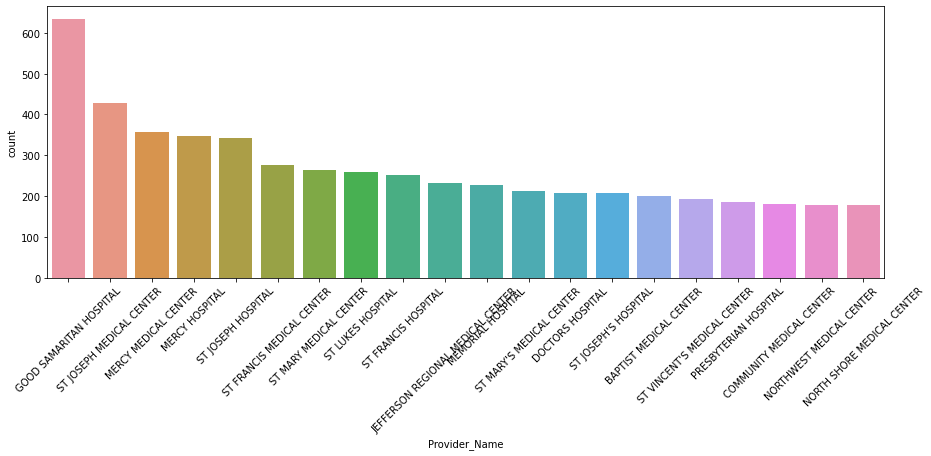

In [10]:
plt.figure(figsize=(15,5))
txt = df['Provider_Name'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_Name' ,data=df , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

### 2.3 Count by City <a class="anchor" id="Section_23"></a>

- From the graph below, we observe that Chicago has highest number of hospital divisions

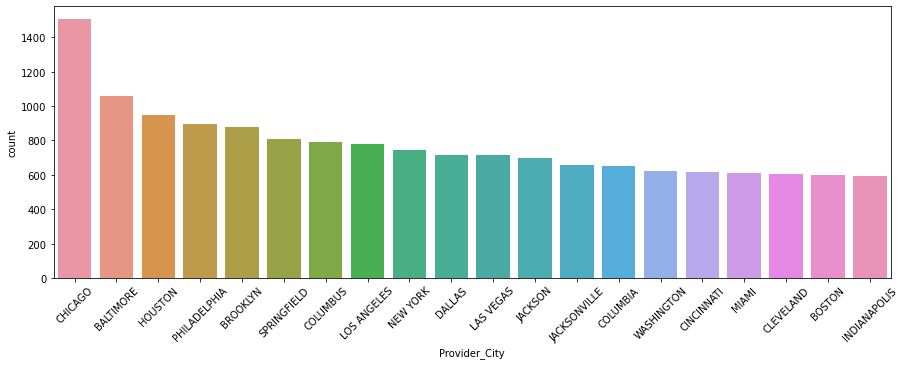

In [11]:
plt.figure(figsize=(15,5))
txt = df['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=df , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

### 2.4 Count by State <a class="anchor" id="Section_24"></a>

- From the graph below, we observe that California, Texas and Florida have highest number of hospital divisions

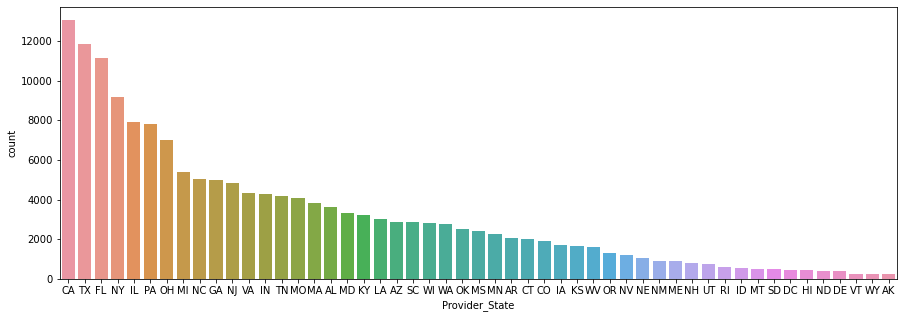

In [12]:

plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=df,order=df['Provider_State'].value_counts().index)

plt.rcParams["axes.labelsize"] = 20

### 2.5 Distribution of payments of different procedures for the top 5 discharges <a class="anchor" id="Section_25"></a>

- Attempted to take the top five discharges in terms of the diagnosis procedures. The highest Average Covered Charges for all industries can be seen in the payments distribution.

In [13]:
dff = df.groupby(['DRG_Definition']).agg({'Average_Total_Payments':'mean','Average_Covered_Charges':'mean','Average_Medicare_Payments':'mean','Total_Discharges':'sum'}).sort_values(by=['Total_Discharges'],ascending=False).reset_index()
dff = dff[:5]
dff

,DRG_Definition,Average_Total_Payments,Average_Covered_Charges,Average_Medicare_Payments,Total_Discharges
0,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,14566.929215,52062.935927,12464.623622,427207
1,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,13238.823385,45934.993962,12169.041668,319072
2,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",5041.766136,19086.716512,3962.437668,244854
3,292 - HEART FAILURE & SHOCK W CC,6957.831656,23517.980789,6132.341256,222038
4,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,5353.763309,18280.231134,4437.804065,206695


<AxesSubplot:xlabel='DRG_Definition'>

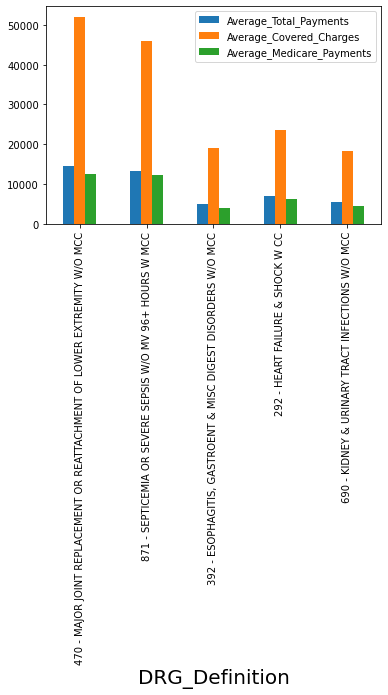

In [14]:
dff.plot(x="DRG_Definition", y=['Average_Total_Payments','Average_Covered_Charges','Average_Medicare_Payments'], kind="bar")
#plt.xticks(rotation=75)

### 2.6 Distribution of payments of Hospital regions for the top 5 discharges  <a class="anchor" id="Section_26"></a>

- Similarly, we tried grouping with respect to the hospital divisons and observed that covered charges are leading among all other payments

In [15]:
dff1 = df.groupby(['Hospital_Referral_Region_Description']).agg({'Average_Total_Payments':'mean','Average_Covered_Charges':'mean','Average_Medicare_Payments':'mean','Total_Discharges':'sum'}).sort_values(by=['Total_Discharges'],ascending=False).reset_index()
dff1 = dff1[:5]
dff1

,Hospital_Referral_Region_Description,Average_Total_Payments,Average_Covered_Charges,Average_Medicare_Payments,Total_Discharges
0,MA - Boston,10496.979845,20962.989677,9488.572182,151896
1,CA - Los Angeles,12840.321481,68254.250964,11797.551443,141274
2,NY - East Long Island,12335.366658,40005.886040,10928.696223,117794
3,FL - Orlando,8387.049767,40544.937919,7232.012830,113759
4,NY - Manhattan,16076.525257,37339.499978,14939.505640,112363


<AxesSubplot:xlabel='Hospital_Referral_Region_Description'>

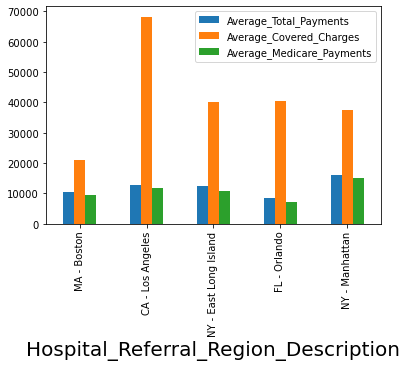

In [16]:
dff1.plot(x="Hospital_Referral_Region_Description", y=['Average_Total_Payments','Average_Covered_Charges','Average_Medicare_Payments'], kind="bar")

## 3. Feature Engineering

- We create various features for the given data which can help identify the outliers and understand the data accurately. 

### 3.1 Ratio count of average total payments per state for each diagnosis procedure

- Idea: We calculated the mean of average total payments grouping by state and diagnosis procedure and tried to check if there are any payments that are deviating from the mean so that we could claim it as fraud. We can check which state is involving more abusive physicians who are charging more for diagnosis procedure.
- This comes under abusive behaviour. 
- This feature enables us to identify the abnormal charges for which the patient will be responsible and any additional payments by third parties for coordination of benefits.

In [17]:
a = df.groupby(['Provider_State','DRG_Definition'])['Average_Total_Payments'].mean().reset_index()
a.columns = ['Provider_State','DRG_Definition','Avg_Payment_ByStateDRG']
a.head()

,Provider_State,DRG_Definition,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [18]:
df1 = pd.merge(df, a, how='left', on=['Provider_State','DRG_Definition'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['state_drug_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByStateDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByStateDRG'])
df1['state_drug_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: state_drug_avg_ratio_amount, dtype: float64

In [19]:
var = 'state_drug_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut( df1[var],percentile)
df1[['state_drug_avg_ratio_amount_D']]
df1.head()


,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Avg_Payment_ByStateDRG,state_drug_avg_ratio_amount,state_drug_avg_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,5743.611739,1.005855,"(0.957, 1.102]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,5743.611739,1.007653,"(0.957, 1.102]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,5743.611739,0.946260,"(0.864, 0.957]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,5743.611739,0.943232,"(0.864, 0.957]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,5743.611739,0.985152,"(0.957, 1.102]"


[Text(0, 0, '(0.384, 0.694]'),
 Text(1, 0, '(0.694, 0.785]'),
 Text(2, 0, '(0.785, 0.864]'),
 Text(3, 0, '(0.864, 0.957]'),
 Text(4, 0, '(0.957, 1.102]'),
 Text(5, 0, '(1.102, 1.383]'),
 Text(6, 0, '(1.383, 1.663]'),
 Text(7, 0, '(1.663, 7.858]')]

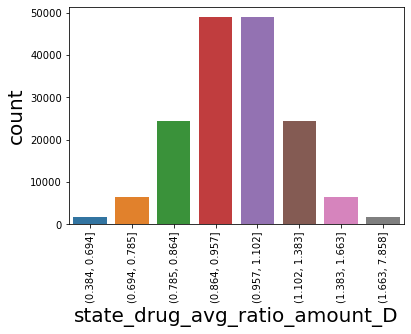

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drug_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

We retrived those hospital divisions in which the physicians involved in abusive behaviour are working. This way we can track these hospitals for necessary action. 

In [21]:
df1.loc[df1['state_drug_avg_ratio_amount']>1.67,'Hospital_Referral_Region_Description']

104            CA - Salinas
280       IL - Melrose Park
294           IL - Evanston
456          MD - Baltimore
537           MN - St. Paul
                ...        
162805         TX - Houston
162822         TX - Houston
162893         TX - Lubbock
162934        VA - Richmond
162972         WA - Seattle
Name: Hospital_Referral_Region_Description, Length: 1573, dtype: object

### 3.2 Ratio count of median total payments per state for each diagnosis

- This is similar to the above intution and the difference is only the median of payments taken into account rather than the mean. The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.

In [22]:
b = df.groupby(['Provider_State','DRG_Definition'])['Average_Total_Payments'].median().reset_index()
b.columns = ['Provider_State','DRG_Definition','Median_Payment_ByStateDRG']
b.head()

,Provider_State,DRG_Definition,Median_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.045
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.250


In [23]:
df2 = pd.merge(df, b, how='left', on=['Provider_State','DRG_Definition'])
df2['state_drug_median_ratio_amount'] = np.where(df2['Median_Payment_ByStateDRG']==0,0, df2['Average_Total_Payments'] / df2['Median_Payment_ByStateDRG'])
df2['state_drug_median_ratio_amount'].describe()

count    163065.000000
mean          1.050746
std           0.211465
min           0.517695
25%           0.925511
50%           1.000000
75%           1.112126
max           9.338775
Name: state_drug_median_ratio_amount, dtype: float64

In [24]:
var = 'state_drug_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)
df2[['state_drug_median_ratio_amount_D']]
df2.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Median_Payment_ByStateDRG,state_drug_median_ratio_amount,state_drug_median_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,5658.33,1.021015,"(1.0, 1.153]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,5658.33,1.022841,"(1.0, 1.153]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,5658.33,0.960522,"(0.908, 1.0]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,5658.33,0.957449,"(0.908, 1.0]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,5658.33,1.000000,"(0.908, 1.0]"


[Text(0, 0, '(0.517, 0.75]'),
 Text(1, 0, '(0.75, 0.83]'),
 Text(2, 0, '(0.83, 0.908]'),
 Text(3, 0, '(0.908, 1.0]'),
 Text(4, 0, '(1.0, 1.153]'),
 Text(5, 0, '(1.153, 1.466]'),
 Text(6, 0, '(1.466, 1.79]'),
 Text(7, 0, '(1.79, 9.339]')]

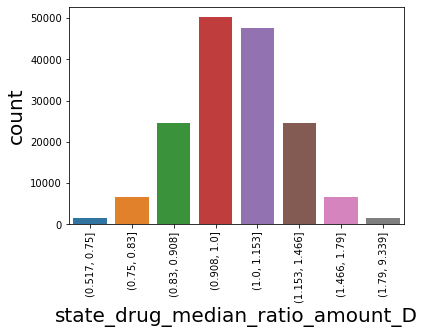

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drug_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [26]:
df2.loc[df2['state_drug_median_ratio_amount']>1.8,'Hospital_Referral_Region_Description']

104                CA - Salinas
280           IL - Melrose Park
294               IL - Evanston
456              MD - Baltimore
690       NY - East Long Island
                  ...          
162713        PA - Philadelphia
162805             TX - Houston
162822             TX - Houston
162893             TX - Lubbock
162934            VA - Richmond
Name: Hospital_Referral_Region_Description, Length: 1549, dtype: object

### 3.3 Ratio count of total covered charges per provider for each hospital

- Idea: We calculated the total amount of average covered charges grouping by the provider name and hospital division
If we are able to find any charged prescription higher than the mean spend, we detect it as an outlier.
Covered charges gives us information on all the charges that are covered by medicare for the discharges
This features enables us to detect any abnormal charges filed on the patient to claim the insurance

In [27]:
c = df.groupby(['Provider_Name','Hospital_Referral_Region_Description'])['Average_Covered_Charges'].sum().reset_index()
c.columns = ['Provider_Name','Hospital_Referral_Region_Description','Sum_Payment_ByNameprovider']
c.head()

,Provider_Name,Hospital_Referral_Region_Description,Sum_Payment_ByNameprovider
0,ABBEVILLE GENERAL HOSPITAL,LA - Lafayette,309353.80
1,ABBOTT NORTHWESTERN HOSPITAL,MN - Minneapolis,4453851.49
2,ABILENE REGIONAL MEDICAL CENTER,TX - Abilene,3587698.19
3,ABINGTON MEMORIAL HOSPITAL,PA - Philadelphia,6786860.92
4,ACMH HOSPITAL,PA - Pittsburgh,391734.02


In [28]:
df3 = pd.merge(df, c, how='left', on=['Provider_Name','Hospital_Referral_Region_Description'])
df3['name_hosp_sum_ratio_amount'] = np.where(df3['Sum_Payment_ByNameprovider']==0,0, df3['Average_Covered_Charges'] / df3['Sum_Payment_ByNameprovider'])
df3['name_hosp_sum_ratio_amount'].describe()

count    163065.000000
mean          0.020452
std           0.036628
min           0.001903
25%           0.007624
50%           0.012352
75%           0.021981
max           1.000000
Name: name_hosp_sum_ratio_amount, dtype: float64

In [29]:
var = 'name_hosp_sum_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut( df3[var],percentile)
df3[['name_hosp_sum_ratio_amount_D']]
df3.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Sum_Payment_ByNameprovider,name_hosp_sum_ratio_amount,name_hosp_sum_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,3242726.59,0.010165,"(0.00691, 0.0124]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,806103.51,0.018772,"(0.0124, 0.0258]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,3177042.74,0.011822,"(0.00691, 0.0124]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,2414914.68,0.005797,"(0.00482, 0.00691]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,3178250.42,0.009953,"(0.00691, 0.0124]"


[Text(0, 0, '(0.0009, 0.00383]'),
 Text(1, 0, '(0.00383, 0.00482]'),
 Text(2, 0, '(0.00482, 0.00691]'),
 Text(3, 0, '(0.00691, 0.0124]'),
 Text(4, 0, '(0.0124, 0.0258]'),
 Text(5, 0, '(0.0258, 0.0564]'),
 Text(6, 0, '(0.0564, 0.122]'),
 Text(7, 0, '(0.122, 1.0]')]

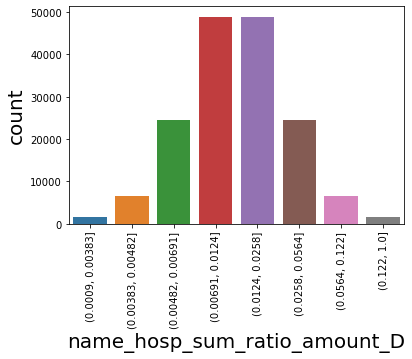

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="name_hosp_sum_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

We retrieved the hospital divisions which are having a covered charge that are more than the normal charges

In [31]:
df3.loc[df3['name_hosp_sum_ratio_amount']>0.13,'Hospital_Referral_Region_Description']

2366         CA - San Francisco
2496      CA - San Mateo County
2508              CA - San Jose
2749              HI - Honolulu
3796                TX - Dallas
                  ...          
162713        PA - Philadelphia
162824             TX - Abilene
162873       TX - Wichita Falls
162893             TX - Lubbock
162917      UT - Salt Lake City
Name: Hospital_Referral_Region_Description, Length: 1444, dtype: object

### 3.4 Ratio count of average medicare charges per provider state for each diagnosis procedure

- Idea: We took the mean of average medicare payments grouping by state and diagnosis procedure. 
This features helps us to identidy those states which have high payment rates than normal which indicates the hospitals in those states are getting paid more by medicare

In [32]:
d = df.groupby(['Provider_State','DRG_Definition'])['Average_Medicare_Payments'].mean().reset_index()
d.columns = ['Provider_State','DRG_Definition','Avg_Payment_ByDRGmedicare']
d.head()

,Provider_State,DRG_Definition,Avg_Payment_ByDRGmedicare
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [33]:
df4 = pd.merge(df, d, how='left', on=['Provider_State','DRG_Definition'])
df4['state_drug_medi_avg_ratio_amount'] = np.where(df4['Avg_Payment_ByDRGmedicare']==0,0, df4['Average_Medicare_Payments'] / df4['Avg_Payment_ByDRGmedicare'])
df4['state_drug_medi_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.215091
min           0.339831
25%           0.868395
50%           0.954250
75%           1.071483
max           5.174415
Name: state_drug_medi_avg_ratio_amount, dtype: float64

In [34]:
var = 'state_drug_medi_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut( df4[var],percentile)
df4[['state_drug_medi_avg_ratio_amount_D']]
df4.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Avg_Payment_ByDRGmedicare,state_drug_medi_avg_ratio_amount,state_drug_medi_avg_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4599.593043,1.035685,"(0.954, 1.111]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,4599.593043,1.081989,"(0.954, 1.111]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4599.593043,0.968301,"(0.954, 1.111]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,4599.593043,0.897723,"(0.849, 0.954]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4599.593043,1.054754,"(0.954, 1.111]"


[Text(0, 0, '(0.339, 0.655]'),
 Text(1, 0, '(0.655, 0.757]'),
 Text(2, 0, '(0.757, 0.849]'),
 Text(3, 0, '(0.849, 0.954]'),
 Text(4, 0, '(0.954, 1.111]'),
 Text(5, 0, '(1.111, 1.43]'),
 Text(6, 0, '(1.43, 1.744]'),
 Text(7, 0, '(1.744, 5.174]')]

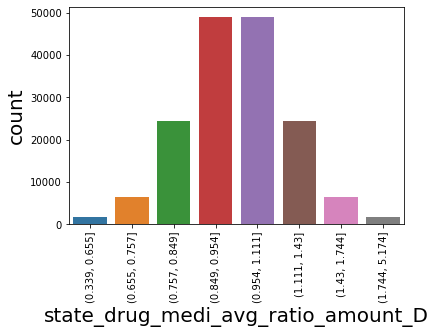

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drug_medi_avg_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [36]:
df4.loc[df4['state_drug_medi_avg_ratio_amount']>1.7,'Hospital_Referral_Region_Description']

59                AR - Little Rock
456                 MD - Baltimore
690          NY - East Long Island
928                   TX - Houston
1172      CA - Contra Costa County
                    ...           
162928        VA - Charlottesville
162934               VA - Richmond
162972                WA - Seattle
163043                WI - Madison
163063                 TX - Dallas
Name: Hospital_Referral_Region_Description, Length: 2128, dtype: object

### 3.5 Ratio count of average number of discharges for each hospital per individual clinical procedure

- Idea: This features helps us to identify the set of hospitals which are having more number of discharges than the average. This indicats these hospitals are trying to claim more amount for their personal benefits

In [37]:
e = df.groupby(['Hospital_Referral_Region_Description','DRG_Definition'])['Total_Discharges'].mean().reset_index()
e.columns = ['Hospital_Referral_Region_Description','DRG_Definition','Mean_Total_Discharges']
e.head()

,Hospital_Referral_Region_Description,DRG_Definition,Mean_Total_Discharges
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [38]:
df5 = pd.merge(df, e, how='left', on=['Hospital_Referral_Region_Description','DRG_Definition'])
df5['hosp_drug_dis_ratio_amount'] = np.where(df5['Mean_Total_Discharges']==0,0, df5['Total_Discharges'] / df5['Mean_Total_Discharges'])
df5['hosp_drug_dis_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.596288
min           0.015412
25%           0.592105
50%           0.886894
75%           1.250000
max          11.008786
Name: hosp_drug_dis_ratio_amount, dtype: float64

In [39]:
var = 'hosp_drug_dis_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut( df5[var],percentile)
df5[['hosp_drug_dis_ratio_amount_D']]
df5.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Mean_Total_Discharges,hosp_drug_dis_ratio_amount,hosp_drug_dis_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,68.000000,1.338235,"(0.887, 1.369]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,27.461538,0.509804,"(0.321, 0.535]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,27.461538,0.873950,"(0.535, 0.887]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,27.461538,0.910364,"(0.887, 1.369]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,27.461538,0.655462,"(0.535, 0.887]"


[Text(0, 0, '(0.0144, 0.2]'),
 Text(1, 0, '(0.2, 0.321]'),
 Text(2, 0, '(0.321, 0.535]'),
 Text(3, 0, '(0.535, 0.887]'),
 Text(4, 0, '(0.887, 1.369]'),
 Text(5, 0, '(1.369, 2.098]'),
 Text(6, 0, '(2.098, 3.086]'),
 Text(7, 0, '(3.086, 11.009]')]

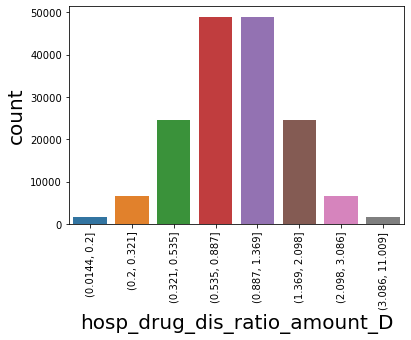

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="hosp_drug_dis_ratio_amount_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [41]:
df5.loc[df5['hosp_drug_dis_ratio_amount']>3,'Hospital_Referral_Region_Description']

60          AR - Little Rock
394             KS - Wichita
473              MA - Boston
571            MO - Columbia
795       OK - Oklahoma City
                 ...        
162070        MA - Worcester
162197        MO - St. Louis
162296           NJ - Camden
162837       TX - Fort Worth
163037          WI - Madison
Name: Hospital_Referral_Region_Description, Length: 1827, dtype: object

### 3.6 Ratio count of average covered charges for each hosp per diagnosis procedure

- Idea: We calculated the mean of average covered charges grouping by hospital division and each diagnosis procedure. This feature helps us identify any payments that are deviating from the mean payments which indicates these set of hospitals are charging more for discharges and get paid by medicare

In [42]:
f = df.groupby(['Hospital_Referral_Region_Description','DRG_Definition'])['Average_Covered_Charges'].mean().reset_index()
f.columns = ['Hospital_Referral_Region_Description','DRG_Definition','Avg_hosp_drg_Covered_Charges']
f.head()

,Hospital_Referral_Region_Description,DRG_Definition,Avg_hosp_drg_Covered_Charges
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,34805.1300
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,31858.5400
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,42453.8100
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,32629.3700
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25843.3225


In [43]:
df6 = pd.merge(df, f, how='left', on=['Hospital_Referral_Region_Description','DRG_Definition'])
df6['hosp_drug_covered_ratio_amount'] = np.where(df6['Avg_hosp_drg_Covered_Charges']==0,0, df6['Average_Covered_Charges'] / df6['Avg_hosp_drg_Covered_Charges'])
df6['hosp_drug_covered_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.317830
min           0.102437
25%           0.794733
50%           0.975768
75%           1.151339
max           4.942205
Name: hosp_drug_covered_ratio_amount, dtype: float64

In [44]:
var = 'hosp_drug_covered_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)
df6[['hosp_drug_covered_ratio_amount_D']]
df6.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Avg_hosp_drg_Covered_Charges,hosp_drug_covered_ratio_amount,hosp_drug_covered_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,36285.175000,0.908445,"(0.752, 0.976]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,40237.356923,0.376065,"(0.10099999999999999, 0.411]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,40237.356923,0.933470,"(0.752, 0.976]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,40237.356923,0.347893,"(0.10099999999999999, 0.411]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,40237.356923,0.786167,"(0.752, 0.976]"


[Text(0, 0, '(0.10099999999999999, 0.411]'),
 Text(1, 0, '(0.411, 0.556]'),
 Text(2, 0, '(0.556, 0.752]'),
 Text(3, 0, '(0.752, 0.976]'),
 Text(4, 0, '(0.976, 1.208]'),
 Text(5, 0, '(1.208, 1.56]'),
 Text(6, 0, '(1.56, 2.021]'),
 Text(7, 0, '(2.021, 4.942]')]

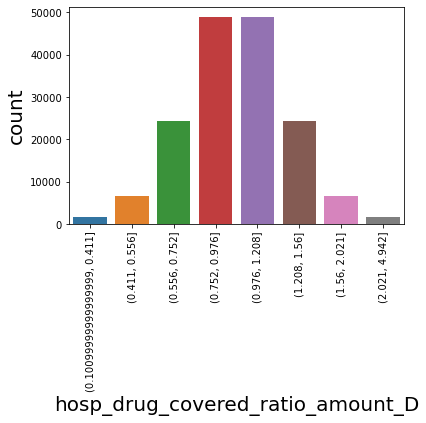

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="hosp_drug_covered_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [46]:
df6.loc[df6['hosp_drug_covered_ratio_amount']>2,'Hospital_Referral_Region_Description']

59         AR - Little Rock
94         CA - Los Angeles
123         CA - Sacramento
159         DC - Washington
160         DC - Washington
                ...        
162660    PA - Philadelphia
162684      PA - Pittsburgh
162711    PA - Philadelphia
162713    PA - Philadelphia
162813         TX - Lubbock
Name: Hospital_Referral_Region_Description, Length: 1751, dtype: object

### 3.7 Ratio count of average medicare payments zipcode wise

- Idea: This feature helps us identify the regions where there are anomalies in the average medicare payments. recording more number of discharges to gain money is a fradulent behaviour. 

In [47]:
g = df.groupby(['Provider_Zip_Code'])['Average_Medicare_Payments'].mean().reset_index()
g.columns = ['Provider_Zip_Code','Average_Medicare_zip_Payments']
g.head()

,Provider_Zip_Code,Average_Medicare_zip_Payments
0,1040,6978.844746
1,1060,6362.157903
2,1069,4846.406579
3,1082,4665.568462
4,1085,5584.111944


In [48]:
df7 = pd.merge(df, g, how='left', on=['Provider_Zip_Code'])
df7['zip_medicare_ratio_amount'] = np.where(df7['Average_Medicare_zip_Payments']==0,0, df7['Average_Medicare_Payments'] / df7['Average_Medicare_zip_Payments'])
df7['zip_medicare_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.745538
min           0.174998
25%           0.532471
50%           0.760642
75%           1.218994
max          15.692215
Name: zip_medicare_ratio_amount, dtype: float64

In [49]:
var = 'zip_medicare_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
df7[['zip_medicare_ratio_amount_D']]
df7.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Medicare_zip_Payments,zip_medicare_ratio_amount,zip_medicare_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,7678.214348,0.620422,"(0.492, 0.761]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,5793.631429,0.858997,"(0.761, 1.334]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,7145.959535,0.623260,"(0.492, 0.761]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,6810.429310,0.606300,"(0.492, 0.761]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,6563.419000,0.739164,"(0.492, 0.761]"


[Text(0, 0, '(0.174, 0.308]'),
 Text(1, 0, '(0.308, 0.374]'),
 Text(2, 0, '(0.374, 0.492]'),
 Text(3, 0, '(0.492, 0.761]'),
 Text(4, 0, '(0.761, 1.334]'),
 Text(5, 0, '(1.334, 2.324]'),
 Text(6, 0, '(2.324, 4.218]'),
 Text(7, 0, '(4.218, 15.692]')]

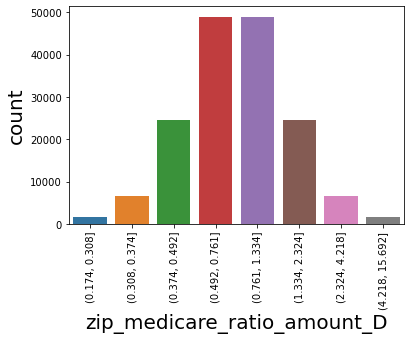

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="zip_medicare_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [51]:
df7.loc[df7['zip_medicare_ratio_amount']>4,'Hospital_Referral_Region_Description']

39433     AL - Birmingham
39437     AL - Birmingham
39438     AL - Huntsville
39442     AL - Birmingham
39443     AL - Birmingham
               ...       
152210     WI - Milwaukee
152211     WI - Milwaukee
152212       WI - Madison
152213     WI - Milwaukee
152215     WI - Milwaukee
Name: Hospital_Referral_Region_Description, Length: 2481, dtype: object

### 3.8 Ratio count of Average medicare payments for hosp and drug

- Idea: This feature helps us identify the hospital divisons who are getting paid more than the average amount by medicare for discharges

In [52]:
h = df.groupby(['Hospital_Referral_Region_Description','DRG_Definition'])['Average_Medicare_Payments'].mean().reset_index()
h.columns = ['Hospital_Referral_Region_Description','DRG_Definition','Avg_hosp_drg_Medicare_Payments']
h.head()

,Hospital_Referral_Region_Description,DRG_Definition,Avg_hosp_drg_Medicare_Payments
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [53]:
df8 = pd.merge(df, h, how='left', on=['Hospital_Referral_Region_Description','DRG_Definition'])
df8['hosp_drug_medicare_payments_ratio_amount'] = np.where(df8['Avg_hosp_drg_Medicare_Payments']==0,0, df8['Average_Medicare_Payments'] / df8['Avg_hosp_drg_Medicare_Payments'])
df8['hosp_drug_medicare_payments_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.175920
min           0.339831
25%           0.893506
50%           0.976954
75%           1.063344
max           4.516504
Name: hosp_drug_medicare_payments_ratio_amount, dtype: float64

In [54]:
var = 'hosp_drug_medicare_payments_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
df8[['hosp_drug_medicare_payments_ratio_amount_D']]
df8.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Avg_hosp_drg_Medicare_Payments,hosp_drug_medicare_payments_ratio_amount,hosp_drug_medicare_payments_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4585.965000,1.038763,"(0.977, 1.093]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,4604.024615,1.080948,"(0.977, 1.093]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4604.024615,0.967369,"(0.873, 0.977]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,4604.024615,0.896859,"(0.873, 0.977]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4604.024615,1.053739,"(0.977, 1.093]"


[Text(0, 0, '(0.339, 0.7]'),
 Text(1, 0, '(0.7, 0.779]'),
 Text(2, 0, '(0.779, 0.873]'),
 Text(3, 0, '(0.873, 0.977]'),
 Text(4, 0, '(0.977, 1.093]'),
 Text(5, 0, '(1.093, 1.337]'),
 Text(6, 0, '(1.337, 1.613]'),
 Text(7, 0, '(1.613, 4.517]')]

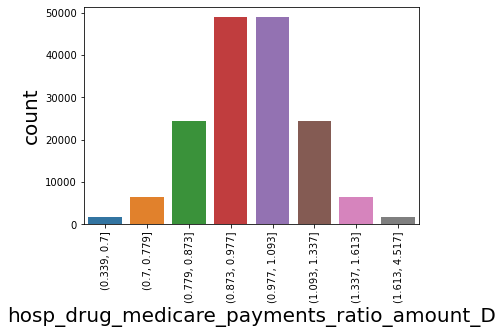

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="hosp_drug_medicare_payments_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [56]:
df8.loc[df8['hosp_drug_medicare_payments_ratio_amount']>1.6,'Hospital_Referral_Region_Description']

59             AR - Little Rock
456              MD - Baltimore
690       NY - East Long Island
755              OH - Cleveland
928                TX - Houston
                  ...          
162893             TX - Lubbock
162934            VA - Richmond
162972             WA - Seattle
163043             WI - Madison
163063              TX - Dallas
Name: Hospital_Referral_Region_Description, Length: 1783, dtype: object

### 3.9 Ratio count of Median medicare Payments for hosp and drug

- This is similar to the above the intution and the only difference is the median of payments

In [57]:
i = df.groupby(['Hospital_Referral_Region_Description','DRG_Definition'])['Average_Medicare_Payments'].median().reset_index()
i.columns = ['Hospital_Referral_Region_Description','DRG_Definition','Median_hosp_drg_Medicare_Payments']
i.head()

,Hospital_Referral_Region_Description,DRG_Definition,Median_hosp_drg_Medicare_Payments
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10495.340
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8372.925


In [58]:
df9 = pd.merge(df, i, how='left', on=['Hospital_Referral_Region_Description','DRG_Definition'])
df9['hosp_drug_medicare_payments_median_ratio_amount'] = np.where(df9['Median_hosp_drg_Medicare_Payments']==0,0, df9['Average_Medicare_Payments'] / df9['Median_hosp_drg_Medicare_Payments'])
df9['hosp_drug_medicare_payments_median_ratio_amount'].describe()

count    163065.000000
mean          1.038494
std           0.196388
min           0.331728
25%           0.935187
50%           1.000000
75%           1.082952
max           5.733904
Name: hosp_drug_medicare_payments_median_ratio_amount, dtype: float64

In [59]:
var = 'hosp_drug_medicare_payments_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
df9[['hosp_drug_medicare_payments_median_ratio_amount_D']]
df9.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Median_hosp_drg_Medicare_Payments,hosp_drug_medicare_payments_median_ratio_amount,hosp_drug_medicare_payments_median_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4585.965,1.038763,"(1.0, 1.118]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,4471.680,1.112940,"(1.0, 1.118]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4471.680,0.995999,"(0.915, 1.0]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,4471.680,0.923402,"(0.915, 1.0]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4471.680,1.084926,"(1.0, 1.118]"


[Text(0, 0, '(0.331, 0.727]'),
 Text(1, 0, '(0.727, 0.816]'),
 Text(2, 0, '(0.816, 0.915]'),
 Text(3, 0, '(0.915, 1.0]'),
 Text(4, 0, '(1.0, 1.118]'),
 Text(5, 0, '(1.118, 1.43]'),
 Text(6, 0, '(1.43, 1.773]'),
 Text(7, 0, '(1.773, 5.734]')]

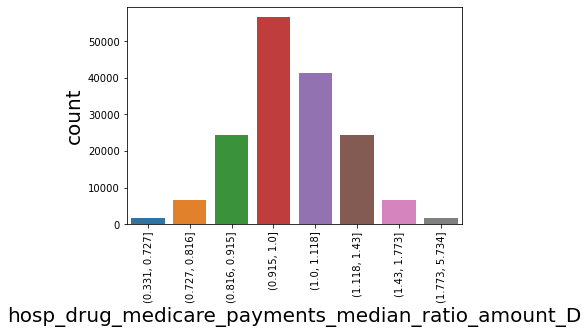

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="hosp_drug_medicare_payments_median_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [61]:
df9.loc[df9['hosp_drug_medicare_payments_median_ratio_amount']>1.7,'Hospital_Referral_Region_Description']

59             AR - Little Rock
456              MD - Baltimore
457             DE - Wilmington
690       NY - East Long Island
755              OH - Cleveland
                  ...          
162928     VA - Charlottesville
162934            VA - Richmond
162972             WA - Seattle
163043             WI - Madison
163063              TX - Dallas
Name: Hospital_Referral_Region_Description, Length: 2431, dtype: object

### 3.10 ratio count of median medicare payments for each state and drugs

- This characteristic, which identifies the median of payments grouping by state and diagnosis procedure of the typical Medicare payments, was already covered above.

In [62]:
j = df.groupby(['Provider_State','DRG_Definition'])['Average_Medicare_Payments'].median().reset_index()
j.columns = ['Provider_State','DRG_Definition','Median_Payment_ByDRGmedicare']
j.head()

,Provider_State,DRG_Definition,Median_Payment_ByDRGmedicare
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10495.340
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8372.925


In [63]:
df10 = pd.merge(df, j, how='left', on=['Provider_State','DRG_Definition'])
df10['state_drug_medi_median_ratio_amount'] = np.where(df10['Median_Payment_ByDRGmedicare']==0,0, df10['Average_Medicare_Payments'] / df10['Median_Payment_ByDRGmedicare'])
df10['state_drug_medi_median_ratio_amount'].describe()

count    163065.000000
mean          1.055484
std           0.234139
min           0.367836
25%           0.916191
50%           1.000000
75%           1.121178
max           6.030981
Name: state_drug_medi_median_ratio_amount, dtype: float64

In [64]:
var = 'state_drug_medi_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['state_drug_medi_median_ratio_amount_D']]
df10.head()

,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Median_Payment_ByDRGmedicare,state_drug_medi_median_ratio_amount,state_drug_medi_median_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,4471.68,1.065311,"(1.0, 1.167]"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,4471.68,1.112940,"(1.0, 1.167]"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,4471.68,0.995999,"(0.897, 1.0]"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,4471.68,0.923402,"(0.897, 1.0]"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,4471.68,1.084926,"(1.0, 1.167]"


[Text(0, 0, '(0.367, 0.714]'),
 Text(1, 0, '(0.714, 0.805]'),
 Text(2, 0, '(0.805, 0.897]'),
 Text(3, 0, '(0.897, 1.0]'),
 Text(4, 0, '(1.0, 1.167]'),
 Text(5, 0, '(1.167, 1.527]'),
 Text(6, 0, '(1.527, 1.898]'),
 Text(7, 0, '(1.898, 6.031]')]

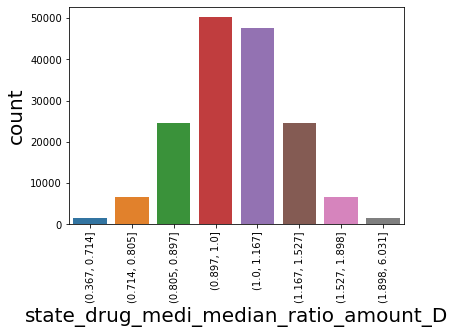

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="state_drug_medi_median_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [66]:
df10.loc[df10['state_drug_medi_median_ratio_amount']>1.9,'Hospital_Referral_Region_Description']

456                 MD - Baltimore
690          NY - East Long Island
1172      CA - Contra Costa County
1186              CA - Los Angeles
1191         CA - San Mateo County
                    ...           
162822                TX - Houston
162893                TX - Lubbock
162928        VA - Charlottesville
163043                WI - Madison
163063                 TX - Dallas
Name: Hospital_Referral_Region_Description, Length: 1610, dtype: object

# 4.Anomaly Detection with PyOD

Feature Engineering plays a crucial role in deterimining outliers for anomaly detection. Now that we created features for the data, we try to detect the outliers using PyOD module in python. Before that let's understand what's PyOD.


What's PyOD?
PyOD is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single well-documented API.

This includes three steps:

Building the model
Determining the boundary
Providing summary statistics
First, we prepare the data for modeling by creating a new dataframe for the features created above.

What's HBOS?
Histogram- based outlier detection (HBOS) is an efficient unsupervised method. It assumes the feature independence and calculates the degree
of outlyingness by building histograms.

Two versions of HBOS are supported:        
    - Static number of bins: uses a static number of bins for all features.
    - Automatic number of bins: every feature uses a number of bins deemed to be optimal according to the Birge-Rozenblac method

    Parameters
    ----------
    n_bins : int or string, optional (default=10)
        The number of bins. "auto" uses the birge-rozenblac method for
        automatic selection of the optimal number of bins for each feature.

    alpha : float in (0, 1), optional (default=0.1)
        The regularizer for preventing overflow.

    tol : float in (0, 1), optional (default=0.5)
        The parameter to decide the flexibility while dealing
        the samples falling outside the bins.

    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set,
        i.e. the proportion of outliers in the data set. Used when fitting to
        define the threshold on the decision function.
        
For more info: https://pyod.readthedocs.io/en/latest/_modules/pyod/models/hbos.html

Coming back to the topic now first, we prepare the data for modeling by creating a new dataframe for the features created above.

In [72]:
#!pip install pyod

In [67]:
# get all the features created in previous assignment 4/ as created above
d1 = df1['state_drug_avg_ratio_amount']
d2 = df2['state_drug_median_ratio_amount']
d3 = df3['name_hosp_sum_ratio_amount']
d4 = df4['state_drug_medi_avg_ratio_amount']
d5 = df5['hosp_drug_dis_ratio_amount']
d6 = df6['hosp_drug_covered_ratio_amount']
d7 = df7['zip_medicare_ratio_amount']
d8 = df8['hosp_drug_medicare_payments_ratio_amount']
d9 = df9['hosp_drug_medicare_payments_median_ratio_amount']
d10 = df10['state_drug_medi_median_ratio_amount']

In [68]:
#combine them to create new dataframe d
d = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10],axis=1)
d

,state_drug_avg_ratio_amount,state_drug_median_ratio_amount,name_hosp_sum_ratio_amount,state_drug_medi_avg_ratio_amount,hosp_drug_dis_ratio_amount,hosp_drug_covered_ratio_amount,zip_medicare_ratio_amount,hosp_drug_medicare_payments_ratio_amount,hosp_drug_medicare_payments_median_ratio_amount,state_drug_medi_median_ratio_amount
0,1.005855,1.021015,0.010165,1.035685,1.338235,0.908445,0.620422,1.038763,1.038763,1.065311
1,1.007653,1.022841,0.018772,1.081989,0.509804,0.376065,0.858997,1.080948,1.112940,1.112940
2,0.946260,0.960522,0.011822,0.968301,0.873950,0.933470,0.623260,0.967369,0.995999,0.995999
3,0.943232,0.957449,0.005797,0.897723,0.910364,0.347893,0.606300,0.896859,0.923402,0.923402
4,0.985152,1.000000,0.009953,1.054754,0.655462,0.786167,0.739164,1.053739,1.084926,1.084926
...,...,...,...,...,...,...,...,...,...,...
163060,0.822038,0.871542,0.009897,0.821462,0.636364,0.957621,0.457385,0.849746,0.950907,0.890412
163061,0.869652,0.922023,0.009307,0.708684,0.282051,1.016316,0.370675,0.683327,0.673311,0.768167
163062,1.231776,1.305955,0.018543,1.085434,0.525692,1.423700,0.521927,1.122806,1.256474,1.176539
163063,1.654736,1.754386,0.017202,1.831685,0.465041,1.347301,0.676129,1.844885,2.031629,1.985426


In [69]:
#rename for easier practice
d.columns = ['F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8',
       'F9', 'F10']

In [70]:
d.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,1.000000,1.050746,0.020452,1.000000,1.000000,1.000000,1.000000,1.000000,1.038494,1.055484
std,0.195274,0.211465,0.036628,0.215091,0.596288,0.317830,0.745538,0.175920,0.196388,0.234139
min,0.384805,0.517695,0.001903,0.339831,0.015412,0.102437,0.174998,0.339831,0.331728,0.367836
25%,0.880824,0.925511,0.007624,0.868395,0.592105,0.794733,0.532471,0.893506,0.935187,0.916191
50%,0.956830,1.000000,0.012352,0.954250,0.886894,0.975768,0.760642,0.976954,1.000000,1.000000
75%,1.064688,1.112126,0.021981,1.071483,1.250000,1.151339,1.218994,1.063344,1.082952,1.121178
max,7.857934,9.338775,1.000000,5.174415,11.008786,4.942205,15.692215,4.516504,5.733904,6.030981


PyOD consists of around 55 algorithms based on Linear models, Proximity based, Probabilistic, Outlier Ensembles, Neural Networks and Combination.
For this analysis, we use HBOS (Proximity-Based)

# 4.1 Histogram Based Outlier Detection (HBOS)

HBOS Outline

The extreme points in a histogram are called the outliers. A data point can be an outlier for one variable but not in an another variable. If a datapoint is an outlier in almost all of the variables, we can confidently categorise it as an outlier. We can calculate all the univariate outlier scores of the data point and get the multivariate score for the point. This multivariate outlier score is called the histogram based outlier score (HBOS).

It can be use to measure the outlierness of a data point interms of all variables. The height of the bin of a data point can be determined as the outlier score.

We used the training and test split data and train the HBOS model.


First select the features which we created in the above analysis and create a new dataframe with these selected features
Split the data into 80% training and 20% testing data
Standardise the data before importing it into the mode

In [74]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(d,train_size=0.8, test_size=0.2,random_state=1234)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(train)    # Only the training data are used to fit the scaler transformation,
train_scaled = scaler.transform(train) 
test_scaled = scaler.transform(test)  # then the scaler is used to trans

The features of data anomalies are significantly different from those of normal instances

In [76]:
# train hbos detector
from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins)
hbos.fit(train_scaled)
HBOS(alpha=0.1, contamination=0.1, n_bins=n_bins, tol=0.5)
train_scores_h = hbos.decision_function(train_scaled)

Then, we predict the test data and get the test scores

In [78]:
# Now we have the trained hbos model, let's apply to the test data to get the predictions
test_pred_h = hbos.predict(test_scaled) # outlier labels (0 or 1)
# Because it is '0' and '1', we can run a count statistic. The number of anomalies is roughly ten percent:
unique, counts = np.unique(test_pred_h, return_counts=True)
dict(zip(unique, counts))
#{0: 29408, 1: 3205}
# And you can generate the anomaly score using clf.decision_function:
test_scores_h = hbos.decision_function(test_scaled)
test_scores_h

array([10.29360513,  8.4656878 ,  3.77552753, ..., 18.78228362,
       12.79209082,  9.33398142])

In [79]:
unique, counts

(array([0, 1]), array([29408,  3205]))

Train and test scores are the anomaly scores for each data point in training data and testing data respectively. From the above calculation, we see that there are 3205 (approx 10%) data points in the testing data in the anomalous category.

Plotting a histogram for the test scores against the count of data points for the respective points.

## Determining Boundary

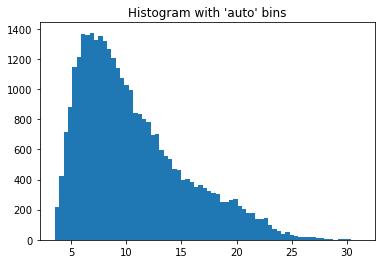

In [80]:
import matplotlib.pyplot as plt
plt.hist(test_scores_h, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

We see here that the majority of the points are having low score which is seen as we move towards the right of the graph. We take the cut point as 25 as there are fewer data points after that score and then cluster the observations less than 25 into cluster 0 which is the normal cluster and the points with score greater than 25 as cluster 1 which is the abnormal or anomalous cluster. We see that there are 156 points in cluster 1 and 32457 points in cluster 0

## Summary Statistics

In [82]:
# Let's see how many '0's and '1's. We get 32457 '0's and 156 '1's.
df_test_h = pd.DataFrame(test_scaled)
df_test_h['score'] = test_scores_h
df_test_h['cluster'] = np.where(df_test_h['score']<25, 0, 1)
df_test_h['cluster'].value_counts()
# Now let's show the summary statistics:
dff_h = df_test_h.groupby('cluster').mean().reset_index()
dff_h.columns = ['cluster','F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8',
       'F9', 'F10', 'score']
dff_h

,cluster,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,score
0,0,-0.019888,-0.020240,-0.007106,-0.015911,0.001332,-0.000963,-0.014151,-0.016598,-0.020538,-0.016632,10.511294
1,1,3.554988,3.636675,1.195636,3.437139,0.109101,1.748478,2.420712,3.303163,3.684525,3.510713,26.665856


1. Seeing the cluster analysis, it is observed that cluster 1 is having a higher score than cluster 0.
2. We then check if there are any features contradicting the cluster scores which means we drop those set of features which are having high scores in cluster 0 than in cluster 1 because they don't make any sense
3. Since all the variables are rightly aligning with the cluster scores which means all of them are having higher scores in cluster 1 than in cluster 0, we do not drop any feature

## 4. 2 Business Insights
An outlier is any data point which differs greatly from the rest of the observations in the dataset. Detecting and treating outliers is also a major step in the data exploration stage. The quality of the inputs decide the quality of the output. Outliers are not necessarily a bad thing. These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. From the above analysis, we determined the probable outliers and categorised them into clusters. Each cluster has the score for every feature which indicates the distribution of data points inside the respective clusters. By seeing the cluster analysis, we realised that there is no need to drop any of the features which gives the businesses an insight that every feature is important and is contributing for the outlier detection.We found that there are  data points in the abnormal cluster and from this we can check for the features which are having high average anomaly score in this cluster which gives an inference about the attribues influencing the frauds in the industry.Also, we observed that there is approximately 10% of the data points in the abnormal cluster which is a good result. If we generate the aggregate models to avoid overfitting, we check for the outliers overall in the data. This way, we could see if a particular data point is categorised as an outlier in all the models, we could confidently categorise it as an outlier